**Descrizione del progetto**

In [67]:
# Import delle librerie necessarie 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**caricamento del dataset e visualizzazione**

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      6     149     149     150     150     150     151     151     150   
1      5     126     128     131     132     133     134     135     135   
2     10      85      88      92      96     105     123     135     143   
3      0     203     205     207     206     207     209     210     209   
4      3     188     191     193     195     199     201     202     203   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     151  ...       138       148       127        89        82        96   
1     136  ...        47       104       194       183       186       184   
2     147  ...        68       166       242       227       230       227   
3     210  ...       154       248       247       248       253       236   
4     203  ...        26        40        64        48        29        46   

   pixel781  pixel782  pixel783  pixel784  
0       106       112       12

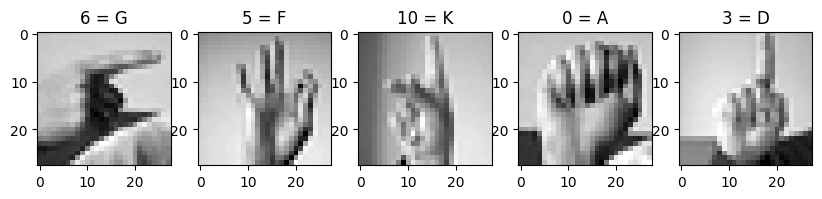

In [68]:
# Creazione di un dizionario per le lettere dell'alfabeto dei segni
lettereALS = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
keys = list(range(26))
Lettere_keys = dict(zip(keys, lettereALS))

dataset = pd.read_csv('sign_mnist_test.csv')

print(dataset.head())
dataset.info()
dataset.describe()

fig, axes = plt.subplots(1,5,figsize=(10,5))
for i, ax in enumerate(axes):
    target = dataset.iloc[i].values[0]
    pixels = dataset.iloc[i].values[1:]
    ax.imshow(pixels.reshape(28,28), cmap='gray')
    ax.set_title(f"{target} = {Lettere_keys[target]}")

plt.show()


**Exploratory Data Analysis (EDA)**

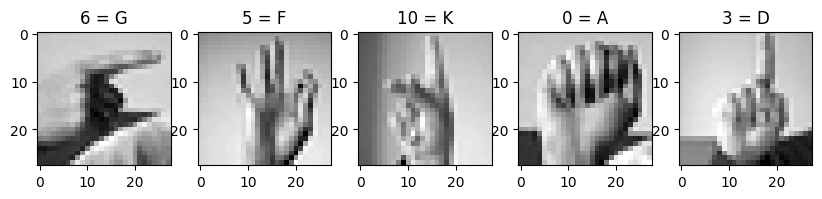

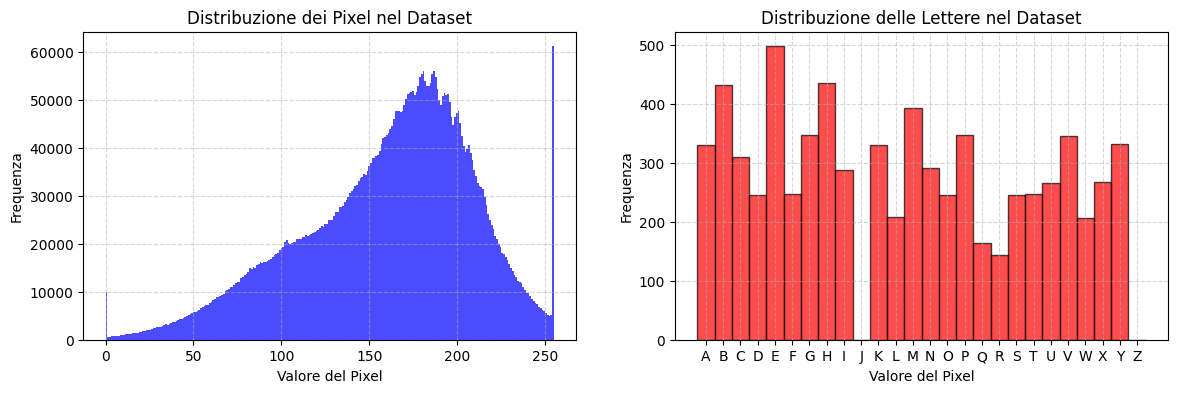

Pixel - Valore minimo: 0, Valore massimo: 255
Pixel - Media: 160.57, Deviazione standard: 49.04
{'A': 331, 'B': 432, 'C': 310, 'D': 245, 'E': 498, 'F': 247, 'G': 348, 'H': 436, 'I': 288, 'J': 0, 'K': 331, 'L': 209, 'M': 394, 'N': 291, 'O': 246, 'P': 347, 'Q': 164, 'R': 144, 'S': 246, 'T': 248, 'U': 266, 'V': 346, 'W': 206, 'X': 267, 'Y': 332, 'Z': 0}


In [ ]:
# Visualizzazione di 5 samples dal dataset
fig, axes = plt.subplots(1,5,figsize=(10,5))
for i, ax in enumerate(axes):
    target = dataset.iloc[i].values[0]
    pixels = dataset.iloc[i].values[1:]
    ax.imshow(pixels.reshape(28,28), cmap='gray')
    ax.set_title(f"{target} = {Lettere_keys[target]}")

plt.show()

pixels = dataset.iloc[:,1:].values
classes = dataset.iloc[:,0].values

# Distribuzione dei pixel (globali) del dataset
fig, axes = plt.subplots(1,2,figsize=(14, 4))
axes[0].hist(pixels.flatten(), bins=256, color='blue', alpha=0.7)
axes[0].grid(True, linestyle="--", alpha=0.5)
axes[0].set_title("Distribuzione dei Pixel nel Dataset")
axes[0].set_xlabel("Valore del Pixel")
axes[0].set_ylabel("Frequenza")

# Distribuzione delle classi delle lettere del dataset
axes[1].hist(classes.flatten(), bins=np.arange(-0.5, 26.5, 1), color='red', alpha=0.7, edgecolor='black')
axes[1].grid(True, linestyle="--", alpha=0.5)
axes[1].set_title("Distribuzione delle Lettere nel Dataset")
axes[1].set_xlabel("Valore del Pixel")
axes[1].set_ylabel("Frequenza")
axes[1].set_xticks(keys)
axes[1].set_xticklabels(Lettere_keys.values())

plt.show()

print(f"Pixel - Valore minimo: {pixels.min()}, Valore massimo: {pixels.max()}")
print(f"Pixel - Media: {pixels.mean():.2f}, Deviazione standard: {pixels.std():.2f}")
# Calcolo delle classi uniche e del loro conteggio

class_counts = np.bincount(classes, minlength=26)

# Stampa formattata come dizionario
output_dict = {Lettere_keys.get(cls, f"Classe {cls}"): count for cls, count in zip(Lettere_keys.keys(), class_counts)}
print(output_dict)

